<a href="https://colab.research.google.com/github/ZeyadSabbah/TrivagoRecommenderSystem/blob/master/TrivagoEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Trivago/

/content/drive/My Drive/Trivago


# Loading Libraries & Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
item_metadata_filepath = './Datasets/raw_data/item_metadata.csv'
submission_popular_filepath = './Datasets/raw_data/submission_popular.csv'
train_filepath = './Datasets/raw_data/train.csv'
test_filepath = './Datasets/raw_data/test.csv'

submission_popular = pd.read_csv(submission_popular_filepath)
item_metadata = pd.read_csv(item_metadata_filepath)
train = pd.read_csv(train_filepath)
test = pd.read_csv(test_filepath)

# Understanding Different Datasets

## train

In [ ]:
train.shape

(15932992, 12)

In [ ]:
train.dtypes

user_id            object
session_id         object
timestamp           int64
step                int64
action_type        object
reference          object
platform           object
city               object
device             object
current_filters    object
impressions        object
prices             object
dtype: object

In [ ]:
train.tail()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
15932987,ZYNMLE3MV3LK,62728015bec05,1541544490,15,interaction item image,6617798,PT,"Paris, France",desktop,NaN,NaN,NaN
15932988,ZYNMLE3MV3LK,62728015bec05,1541544491,16,clickout item,6617798,PT,"Paris, France",desktop,Focus on Distance,6617798|1263420|9567886|1161323|149768|1890735...,58|96|55|75|90|60|233|104|150|145|328|207|150|...
15932989,ZYNMLE3MV3LK,62728015bec05,1541544540,17,clickout item,2712342,PT,"Paris, France",desktop,Focus on Distance,6617798|1263420|9567886|1161323|149768|1890735...,58|96|55|75|90|60|233|104|150|145|328|207|150|...
15932990,ZYNMLE3MV3LK,62728015bec05,1541544967,18,change of sort order,interaction sort button,PT,"Paris, France",desktop,NaN,NaN,NaN
15932991,ZYNMLE3MV3LK,62728015bec05,1541544973,19,clickout item,1161323,PT,"Paris, France",desktop,Focus on Distance,6617798|1263420|9567886|1161323|149768|1890735...,58|96|55|75|90|60|233|104|150|145|328|207|150|...


## test

In [ ]:
test.shape

(3782335, 12)

In [ ]:
test.dtypes

user_id            object
session_id         object
timestamp           int64
step                int64
action_type        object
reference          object
platform           object
city               object
device             object
current_filters    object
impressions        object
prices             object
dtype: object

In [ ]:
test.tail(1)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
3782334,ZZCM39YKI3NR,6226bde1465e7,1541601178,1,clickout item,NaN,IT,"Dublin, Ireland",mobile,NaN,46149|109974|46119|8333280|12455|1185556|84002...,138|138|156|153|128|202|145|137|105|68|133|167...


## submission_popular

This is the form on how the test set predictions should be submitted.

In [ ]:
submission_popular.head(2)

,user_id,session_id,timestamp,step,item_recommendations
0,000324D9BBUC,89643988fdbfb,1541593942,10,924795 106315 1033140 119494 101758 903037 105...
1,0004Q49X39PY,9de47d9a66494,1541641157,1,3505150 3812004 2227896 2292254 3184842 222702...


In [ ]:
test[test.session_id=='9de47d9a66494']

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
1030763,0004Q49X39PY,9de47d9a66494,1541641157,1,clickout item,NaN,PH,"Iloilo City, Philippines",mobile,NaN,2213014|3184842|10213134|4504242|4486372|38120...,53|40|112|57|76|29|42|37|66|66|26|43|28|46|28|...


In [ ]:
test_impressions = test[test.session_id=='9de47d9a66494'].impressions.values[0].split('|')
item_recommendations = submission_popular[submission_popular.session_id=='9de47d9a66494'].item_recommendations.values[0].split(' ')

sorted(test_impressions) == sorted(item_recommendations)

True

## item_metadata

In [ ]:
item_metadata.head()

,item_id,properties
0,5101,Satellite TV|Golf Course|Airport Shuttle|Cosme...
1,5416,Satellite TV|Cosmetic Mirror|Safe (Hotel)|Tele...
2,5834,Satellite TV|Cosmetic Mirror|Safe (Hotel)|Tele...
3,5910,Satellite TV|Sailing|Cosmetic Mirror|Telephone...
4,6066,Satellite TV|Sailing|Diving|Cosmetic Mirror|Sa...


# Research Questions

In [ ]:
from datetime import datetime

latest_timestamp = train.timestamp.max()
earliest_timestamp = train.timestamp.min()
print(datetime.fromtimestamp(latest_timestamp) - datetime.fromtimestamp(earliest_timestamp))

5 days, 23:59:51


In [ ]:
latest_timestamp = test.timestamp.max()
earliest_timestamp = test.timestamp.min()
print(datetime.fromtimestamp(latest_timestamp) - datetime.fromtimestamp(earliest_timestamp))

1 day, 23:59:52


In [ ]:
latest_timestamp = train.timestamp.max()
earliest_timestamp = train.timestamp.min()

latest_date = datetime.fromtimestamp(latest_timestamp)
earliest_date = datetime.fromtimestamp(earliest_timestamp)

print(earliest_date)
print(latest_date)

2018-11-01 00:00:08
2018-11-06 23:59:59


In [ ]:
latest_timestamp = test.timestamp.max()
earliest_timestamp = test.timestamp.min()

latest_date = datetime.fromtimestamp(latest_timestamp)
earliest_date = datetime.fromtimestamp(earliest_timestamp)

print(earliest_date)
print(latest_date)

2018-11-07 00:00:07
2018-11-08 23:59:59


In [ ]:
import calendar

latest_timestamp = train.timestamp.max()
earliest_timestamp = train.timestamp.min()

latest_date = datetime.fromtimestamp(latest_timestamp)
earliest_date = datetime.fromtimestamp(earliest_timestamp)

first_day = calendar.day_name[earliest_date.weekday()]
last_day = calendar.day_name[latest_date.weekday()]
print(first_day)
print(last_day)

Thursday
Tuesday


In [ ]:
latest_timestamp = test.timestamp.max()
earliest_timestamp = test.timestamp.min()

latest_date = datetime.fromtimestamp(latest_timestamp)
earliest_date = datetime.fromtimestamp(earliest_timestamp)

first_day = calendar.day_name[earliest_date.weekday()]
last_day = calendar.day_name[latest_date.weekday()]
print(first_day)
print(last_day)

Wednesday
Thursday


Train set is a collection of datapoints of the sessions collected through 6 days starting from Thursday to Tuesday. On the other hand, test set was only through 2 days, Wednesday and Thursday. That took place in November, 2018.  


**What is the distribution of the number of steps in sessions?**

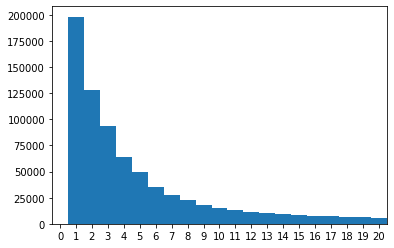

In [ ]:
bin_size = 1
sessions_steps = train.groupby('session_id', sort=False).timestamp.count()
bin_edges = np.arange(0, sessions_steps.max() + bin_size, bin_size)
x_locs = np.arange(0, 21, 1) + 0.5
x_labels = np.arange(0, 21, 1)

plt.hist(sessions_steps, bins=bin_edges)
plt.xticks(x_locs, x_labels)
plt.xlim([0, 21])

plt.show()

Data is right skewed. It seems tham most of the users don't take many steps while they are checking accommodations.

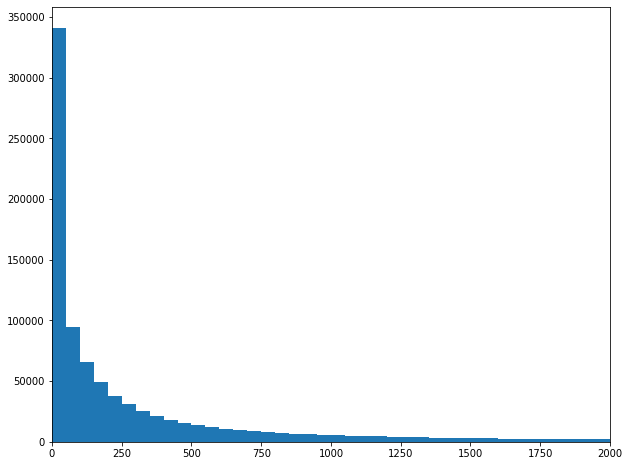

In [ ]:
sessions_duration = train.groupby('session_id', sort=False).timestamp.max() - train.groupby('session_id', sort=False).timestamp.min()
bin_size = 50
bin_edges = np.arange(0, 2000 + bin_size, bin_size)

plt.figure(figsize=[10, 8])
plt.hist(sessions_duration, bins=bin_edges)
plt.xlim([0, 2000])

plt.show()

Checking duration of the sessions, also it is right skewed. Most of the users do not spend long time, or in other words some of the users spent really long time during their sessions.

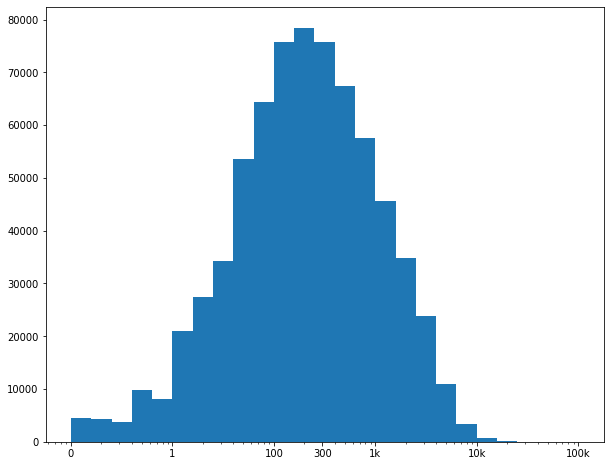

In [ ]:
bin_size = 0.2
bin_edges = 10 ** np.arange(0, 5 + bin_size, bin_size)

plt.figure(figsize=[10, 8])
plt.hist(sessions_duration, bins=bin_edges)
x_locs = [1e0, 1e1, 1e2, 3e2, 1e3, 1e4, 1e5]
x_labels = ['0', '1', '100', '300', '1k', '10k', '100k']
plt.xscale('log')
plt.xticks(x_locs, x_labels)
plt.show()

Right skewed data of the duration in the sessions can be scaled out so it can be normally distribute. Only then, it can be used in machine learning model for prediction.

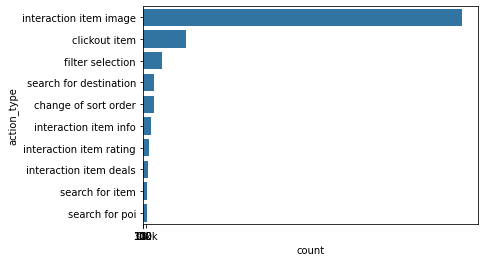

In [ ]:
action_type_order = train.action_type.value_counts().index
base_color = sns.color_palette()[0]
sns.countplot(data=train, y='action_type', color=base_color, order=action_type_order)

plt.xticks(x_locs, x_labels)
plt.show()

Most of the users user interact with item image. Users get attracted to the images of the accommodations, and it might be very important feature when a user is making their minds to pick an accommodation over another.

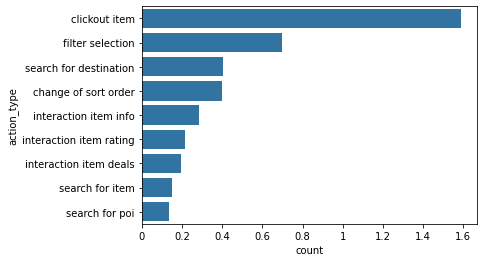

In [ ]:
action_type_order = train[train.action_type!='interaction item image'].action_type.value_counts().index
base_color = sns.color_palette()[0]
sns.countplot(data=train, y='action_type', color=base_color, order=action_type_order)
x_locs = [0, 0.2e6, 0.4e6, 0.6e6, 0.8e6, 1e6, 1.2e6, 1.4e6, 1.6e6]
x_labels = ['0', '0.2', '0.4', '0.6', '0.8', '1', '1.2', '1.4', '1.6']
plt.xticks(x_locs, x_labels)
plt.show()

Because 'interaction with item image' had very a higher value in terms of counting the values of the action type, removing it was essential in order to see how the other actions compare to each others. Clicking out the items comes second which is logical.  
Some of the least actions can be further investigated as it might be not very clear for the users how to use some actions.

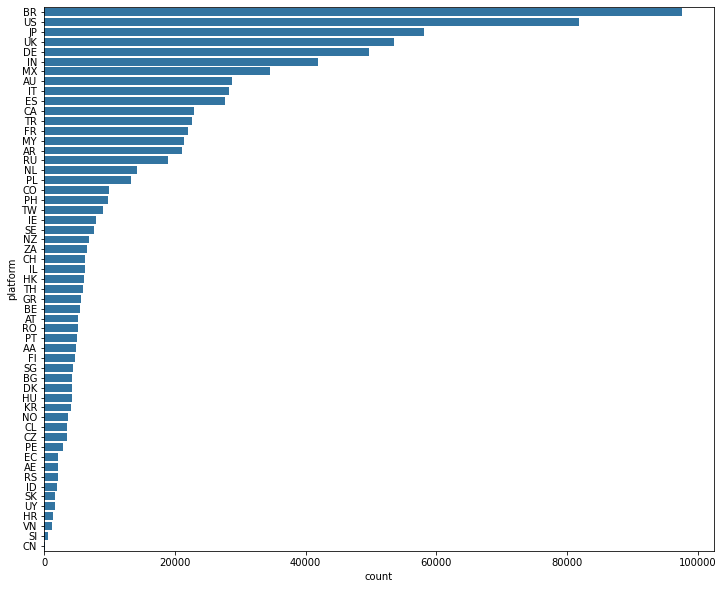

In [ ]:
clickout_df = train[train.action_type=='clickout item'].groupby('session_id', sort=False).tail(1)
base_color = sns.color_palette()[0]
platform_order = clickout_df.platform.value_counts().index
plt.figure(figsize=[12, 10])
sns.countplot(data=clickout_df, y='platform', color=base_color, order=platform_order)
plt.show()

The platforms represent where the user is checking out the website or the app. It shows that number one platform from the prespective of number of sessions, Brazil has the most number of sessions, while USA is the second, and so on.

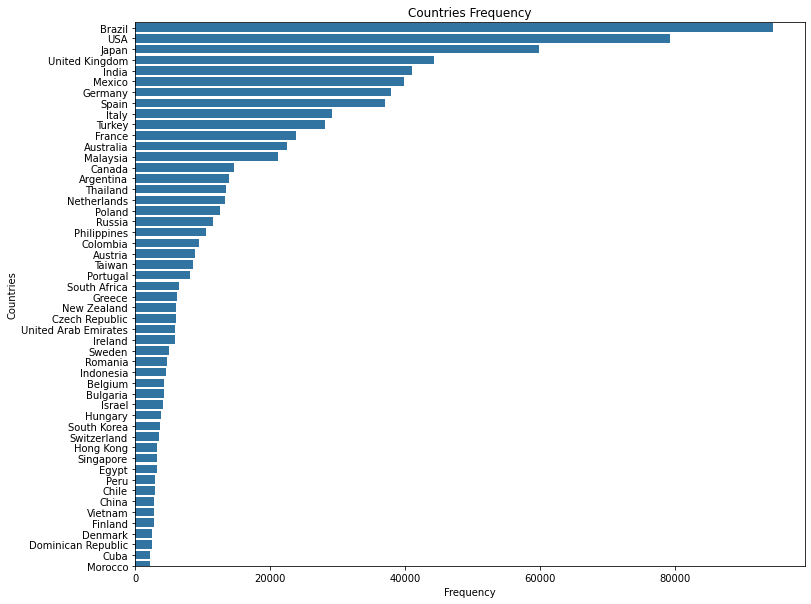

In [ ]:
countries = clickout_df.city.apply(lambda x: x.split(',')[1]).apply(lambda x: x.strip())
countries_order = countries.value_counts().index

plt.figure(figsize=[12, 10])
sns.countplot(y=countries, color=base_color, order=countries_order)
plt.ylim(50)
plt.xlabel('Frequency')
plt.ylabel('Countries')
plt.title('Countries Frequency')
plt.show()

The 'cities' attribute represents where the accommodations being checked by the user are, and it contains city and country separated with a comma and a space, so country was extracted and by plotting the countries, it shows where the accommodations are most checked.  
From the above graph and the one before, it shows that domistic bookings are more common in this case.

In [ ]:
clickout_df['date_time'] = clickout_df.timestamp.apply(lambda x: datetime.fromtimestamp(x))
clickout_df['day_of_week'] = clickout_df.date_time.apply(lambda x: calendar.day_name[x.weekday()])
clickout_df.head(1)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices,date_time,day_of_week
15,00RL8Z82B2Z1,aff3928535f48,1541038485,16,clickout item,1257342,AU,"Sydney, Australia",mobile,NaN,55109|129343|54824|2297972|109014|1257342|1031...,162|25|150|143|101|49|118|131|18|100|101|143|5...,2018-11-01 02:14:45,Thursday


In [ ]:
day_of_week_order = ['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday']
week = pd.api.types.CategoricalDtype(categories=day_of_week_order, ordered=True)
clickout_df.groupby('day_of_week').session_id.count()

day_of_week
Friday      132126
Monday      146582
Saturday    125188
Sunday      140455
Thursday    137190
Tuesday     145301
Name: session_id, dtype: int64

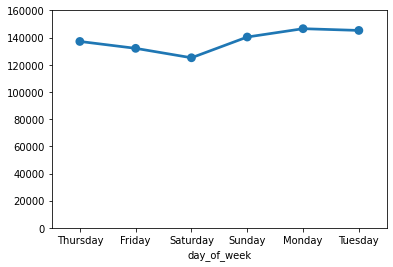

In [ ]:
day_of_week_order = ['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday']
sessions_day = clickout_df.groupby('day_of_week').session_id.count()
sns.pointplot(x=sessions_day.index, y=sessions_day.values, order=day_of_week_order)
plt.ylim([0, 160000])
plt.show()

This graph shows the traffic on the 6 days period over the train set. It shows that the traffic went low on Saturday, and then it kept going up till Tuesday. The datapoint Wednesday is in the test set, but it should not be checked out so there is no bias on my side.

In [ ]:
sessions_duration = train.groupby('session_id', sort=False).timestamp.max() - \
                    train.groupby('session_id', sort=False).timestamp.min()
sessions_duration = sessions_duration.reset_index().rename(columns={'timestamp':'duration'})
clickout_df = clickout_df.merge(sessions_duration, on='session_id', how='left')
clickout_df.head(1)

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices,date_time,day_of_week,duration
0,00RL8Z82B2Z1,aff3928535f48,1541038485,16,clickout item,1257342,AU,"Sydney, Australia",mobile,NaN,55109|129343|54824|2297972|109014|1257342|1031...,162|25|150|143|101|49|118|131|18|100|101|143|5...,2018-11-01 02:14:45,Thursday,1025


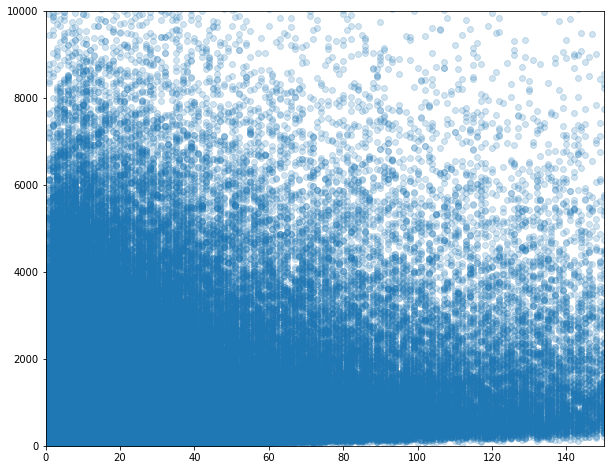

In [ ]:
plt.figure(figsize=[10, 8])
plt.scatter(clickout_df.step, clickout_df.duration, alpha=0.2)
plt.xlim([0, 150])
plt.ylim([0, 10000]);

A positive relationship intuition can be obtained since the density of the point increases when it goes left and down at the same time. It is not very clear though because of the overplotting.

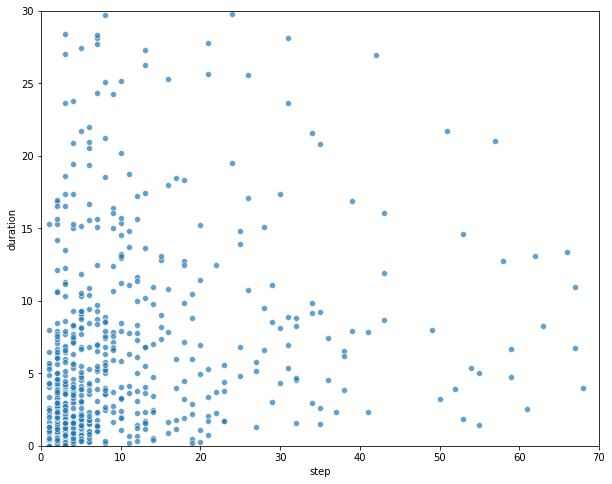

In [ ]:
np.random.seed(42)
clickout_df_sample = clickout_df.sample(1000)
plt.figure(figsize=[10, 8])
sns.scatterplot(clickout_df_sample.step, clickout_df_sample.duration/(60), alpha=0.7)
plt.xlim([0, 70])
plt.ylim([0, 30])
plt.show()

After sampling, it is clear that there is a positive correlation from the graph.

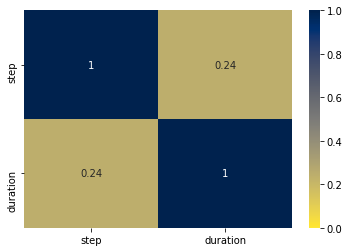

In [ ]:
sns.heatmap(clickout_df[['step', 'duration']].corr(), cmap='cividis_r', annot=True, vmin=0);

Correlation coefficient between step and duration is 0.24. There is a positive weak correlation.

In [ ]:
def get_list(List):
  ''' Function splits the string separated by pip and returns a list of strings'''
  items_list = List.split('|')
  return items_list

def get_rank(reference, List):
  ''' Function that gets the rank of user's item selection 
      Note: Some of the references are not in the impressions list, it is not an error though. '''
  try:
    rank = get_list(List).index(reference) + 1
  except:
    rank = 0
  return rank

In [ ]:
clickout_df['rank'] = clickout_df.apply(lambda x: get_rank(x.reference, x.impressions), axis=1).values

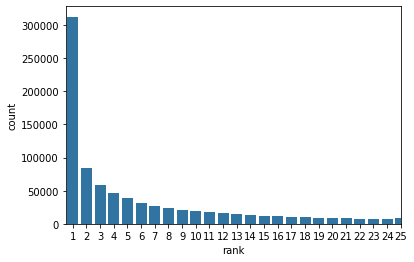

In [ ]:
sns.countplot(data=clickout_df, x='rank', color=base_color)
plt.xlim([0.5, 25]);

What the graph suggests is that users select the first item shown to the. The says a lot about the Trivago Recommender Engine is already doing. It works well.

In [ ]:
round(len(clickout_df[clickout_df['rank']==1])/len(clickout_df), 3)

0.378

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


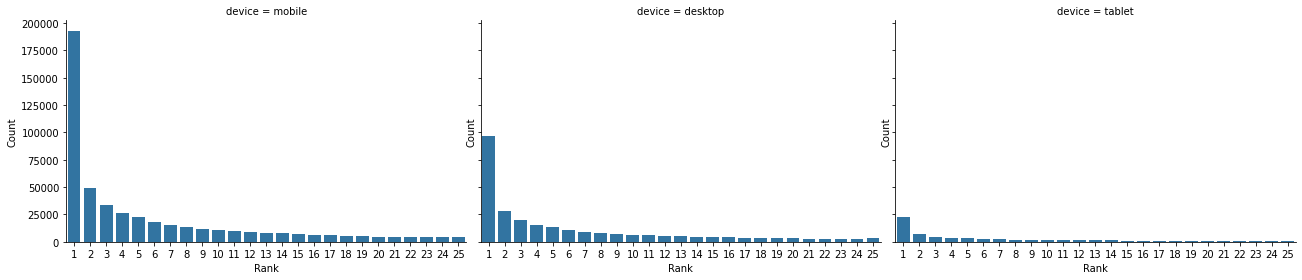

In [ ]:
g = sns.FacetGrid(clickout_df, col='device', height=4, aspect=1.5)
g.map(sns.countplot, 'rank')
g.set(xlim=[0.5, 25.5], xlabel='Rank', ylabel='Count');

These graphs show that still the number one choice is the first item on the top of the list. Also, it shows that more users are using mobile devices than desktop, and more using desktop than tablet.  
It is not clear in these graphs wether there is a relationship between selecting the item and the device being used in the session, that's why relative frequency in the next graphs might help.

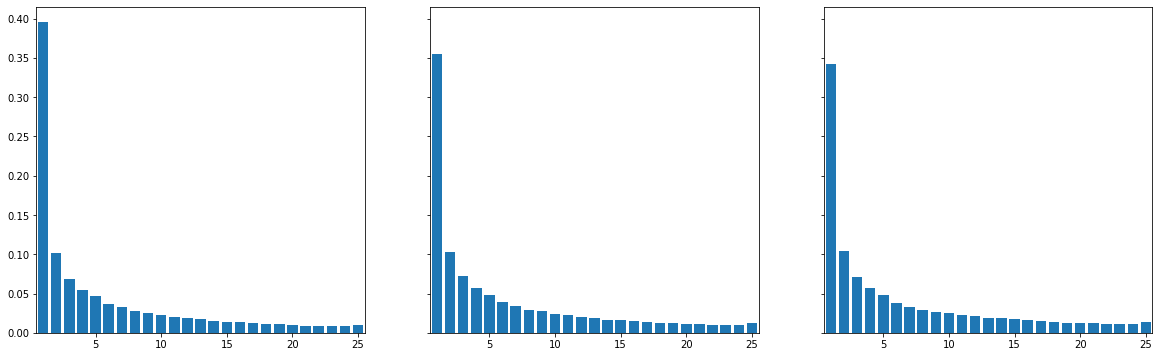

In [ ]:
mobile_rf = clickout_df[clickout_df.device=='mobile']['rank'].value_counts()/len(clickout_df[clickout_df.device=='mobile'])
desktop_rf = clickout_df[clickout_df.device=='desktop']['rank'].value_counts()/len(clickout_df[clickout_df.device=='desktop'])
tablet_rf = clickout_df[clickout_df.device=='tablet']['rank'].value_counts()/len(clickout_df[clickout_df.device=='tablet'])

fig, axes = plt.subplots(1, 3, sharey=True, figsize=[20, 6])
dfs = [mobile_rf, desktop_rf, tablet_rf]
for i in range(3):
  plt.sca(axes[i])
  plt.bar(dfs[i].index, dfs[i].values)
  plt.xlim([0.5, 25.5])

The graphs did not help a lot as the graphs look very similar to each others. In order to get an answer to our question of wether the device used affect the selection of the user or not, further investigation with hypothesis testing using bootstrapping technique might be required.

In [ ]:
def get_price(List, rank):
  ''' Function that gets the price of the selected item.
      Note: The try is used as item selected might not be in the impressions list, it is not an error though, but requires an action.'''
  try:
    items_list = List.split('|')
    price = items_list[rank]
  except:
    price = np.nan
  return price

In [ ]:
clickout_df['price'] = clickout_df.apply(lambda x: get_price(x.prices, x['rank'] - 1), axis=1).values

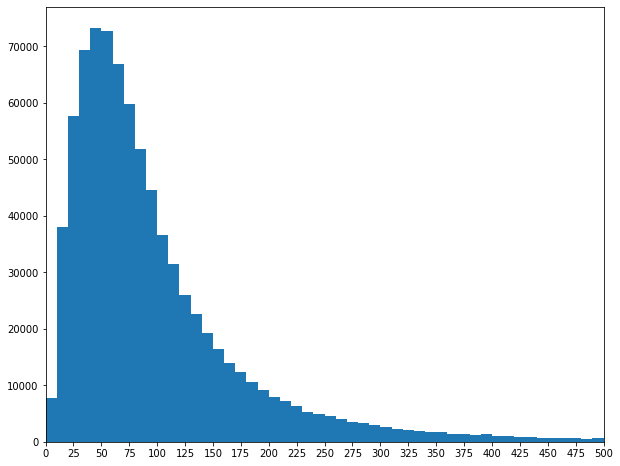

In [ ]:
plt.figure(figsize=[10, 8])
bin_edges = np.arange(0, 510, 10)
plt.hist(clickout_df['price'].astype(int), bins=bin_edges)
plt.xlim([0, 500])
plt.xticks([])
x_ticks = np.arange(0, 525, 25)
plt.xticks(x_ticks, x_ticks);

The data is right skewed. The prices of the accommodations selected by the users lie around lower values, and there some accommodations are very expensive leading to the long tail on the right.

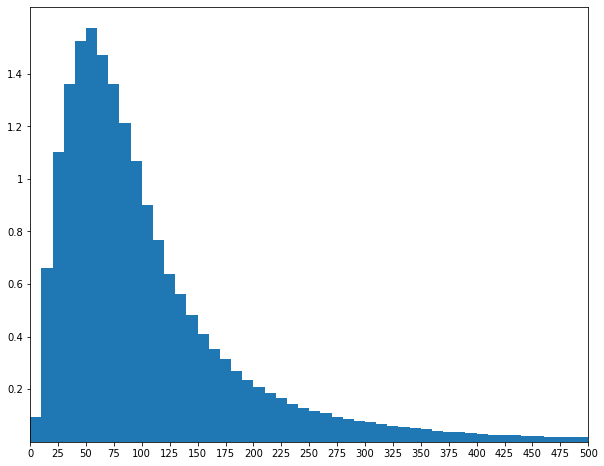

In [ ]:
all_accomodations_prices = clickout_df.prices.apply(lambda x: x.split('|')).explode()
plt.figure(figsize=[10, 8])
bin_edges = np.arange(0, 510, 10)
plt.hist(all_accomodations_prices.astype(int), bins=bin_edges)
plt.xlim([0, 500])
plt.xticks([])
x_ticks = np.arange(0, 525, 25)
plt.xticks(x_ticks, x_ticks)
y_locs = [0.2e6, 0.4e6, 0.6e6, 0.8e6, 1e6, 1.2e6, 1.4e6]
y_labels = [0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4]
plt.yticks(y_locs, y_labels);

Same concept as in the graph before, only this time it's containing all the accommodations shown to users.

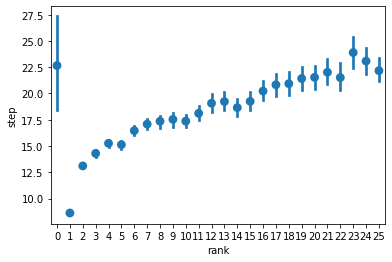

In [ ]:
sns.pointplot(data=clickout_df, x='rank', y='step', linestyles='');

There is a positive relationship between the rank of the selected item and the number steps taken in the session.

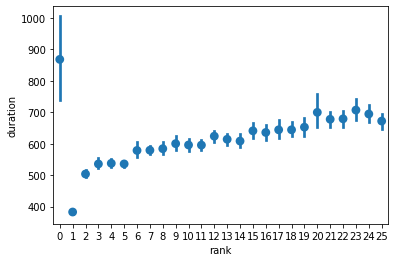

In [ ]:
sns.pointplot(data=clickout_df, x='rank', y='duration', linestyles='')

Same thing is applied to the duration of the sessions.

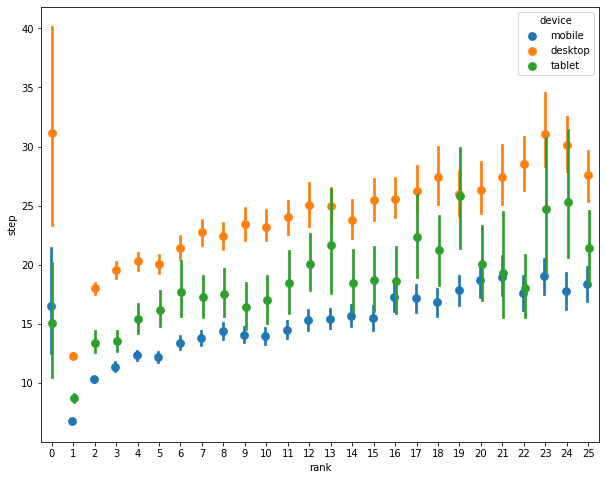

In [ ]:
plt.figure(figsize=[10, 8])
sns.pointplot(data=clickout_df, x='rank', y='step', hue='device', linestyles='', dodge=True)
plt.show()

This graph shows that desktop users tend to make more steps than tablets more than mobiles for the same rank. A further investigation can help in knowing why that happens. While preparing for Machine Learning model, an interaction should be put into consideration.

In [ ]:
clickout_df['price'] = clickout_df['price'].astype(int)

In [ ]:
clickout_df['prices_mean'] = clickout_df.prices.apply(lambda x: x.split('|'))\
                                               .apply(lambda x: list(map(int, x)))\
                                               .apply(lambda x: np.array(x).mean())\
                                               .apply(lambda x: np.floor(x))

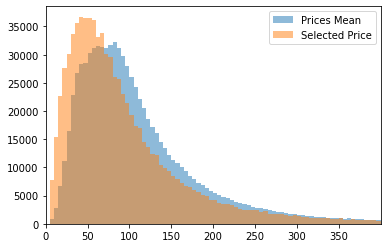

In [ ]:
bins = np.arange(0, 450, 5)
plt.hist(clickout_df.prices_mean, bins=bins, alpha=0.5, label='Prices Mean')
plt.hist(clickout_df.price.astype(int), bins=bins, alpha=0.5, label='Selected Price')
plt.xlim([0, 400])
x_ticks = np.arange(0, 400, 50)
plt.xticks(x_ticks, x_ticks)
plt.legend()
plt.show()

The distribution of the prices of selected items by the user is shifted litle bit to the left and has higher height than that of the distribution of the mean of the prices. That shows that users in general would pick an item with price less than the mean price of all items shown to them.

In [ ]:
clickout_df['prices_median'] = clickout_df.prices.apply(lambda x: x.split('|'))\
                                          .apply(lambda x: list(map(int, x)))\
                                          .apply(lambda x: np.median(np.array(x)))

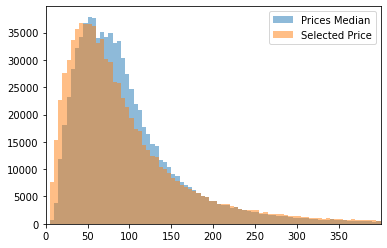

In [ ]:
bins = np.arange(0, 450, 5)
plt.hist(clickout_df.prices_median, bins=bins, alpha=0.5, label='Prices Median')
plt.hist(clickout_df.price.astype(int), bins=bins, alpha=0.5, label='Selected Price')
plt.xlim([0, 400])
x_ticks = np.arange(0, 400, 50)
plt.xticks(x_ticks, x_ticks)
plt.legend()
plt.show()

The distribution of the selected item price is still shifted to the left and that supports the fact that users would go for lower prices than the average in general.

In [ ]:
clickout_df['sorted_prices'] = clickout_df.prices.apply(lambda x: x.split('|'))\
                                                 .apply(lambda x: list(map(int, x)))\
                                                 .apply(lambda x: sorted(x))

In [ ]:
def get_price_rank(price, price_list):
  try:
    rank = price_list.index(price) + 1
  except:
    rank = 0
  return rank

In [ ]:
clickout_df['price_rank'] = clickout_df[['price', 'sorted_prices']].apply(lambda x: get_price_rank(x.price, x.sorted_prices), axis=1)

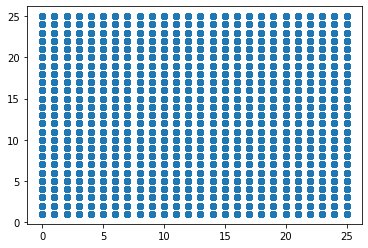

In [ ]:
plt.scatter(clickout_df['rank'], clickout_df['price_rank'])

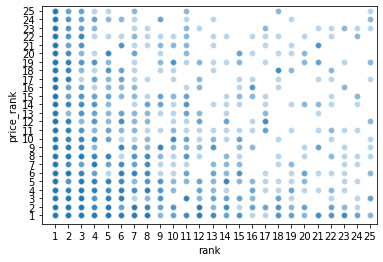

In [ ]:
clickout_df_sample = clickout_df.sample(2000)
sns.scatterplot(clickout_df_sample['rank'], clickout_df_sample['price_rank'], alpha=0.3)
x_y_ticks = np.arange(1, 25 + 1, 1)
plt.yticks(x_y_ticks, x_y_ticks)
plt.xticks(x_y_ticks, x_y_ticks)
plt.xlim([0, 25.5])
plt.ylim([0, 25.5]);

Although it is clear that the density seems to be heavier on the left bottom corner of the graph, and it might make an intuition of the presence of a correlation between the ranking, actually there is not. The fact that the ranking distribution is right skewed affects the graph over here, and that's it.

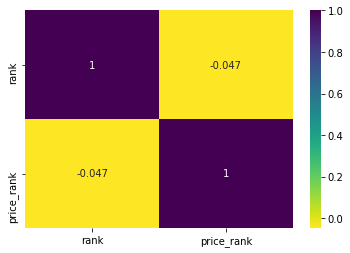

In [ ]:
sns.heatmap(clickout_df_sample[['rank', 'price_rank']].corr(), annot=True, cmap='viridis_r');

The Pearson correlation factor assures that there is no relationship at all between both ranking.